## Problem 1

a)

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Data Preparation

In [4]:
# Load the data
data_path = '/content/drive/MyDrive/733_homework3/homework3/SP500_close_price_no_missing.csv'  # Replace with your file path
sp500_data = pd.read_csv(data_path)

# Convert the date column to datetime and set it as the index
sp500_data['date'] = pd.to_datetime(sp500_data['date'])
sp500_data.set_index('date', inplace=True)
sp500_data

,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,86.79,62.24,47.82,58.03,31.29,8.47,12.54,31.04,57.54,41.88,...,30.67,108.99,23.56,11.71,29.42,22.16,16.75,49.09,54.97,25.17
2011-01-04,86.67,62.20,48.27,56.22,31.51,8.77,12.60,31.20,56.49,41.49,...,30.48,112.39,23.66,11.40,29.54,22.05,16.59,48.34,54.24,24.76
2011-01-05,86.67,61.99,48.27,55.35,32.22,8.91,12.77,31.50,56.38,41.40,...,30.38,113.84,23.52,11.46,29.64,22.17,16.91,48.57,54.28,24.90
2011-01-06,86.14,61.72,48.17,53.53,32.27,8.69,12.99,32.09,56.07,41.48,...,29.94,114.67,23.50,11.46,30.14,22.16,17.06,48.91,52.60,24.83
2011-01-07,86.23,61.26,48.37,53.57,32.04,8.83,12.99,32.16,55.85,41.62,...,29.83,118.73,23.71,11.30,29.97,22.12,16.90,49.52,52.59,24.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-25,166.96,116.03,45.70,28.06,74.74,2.65,13.81,89.59,61.94,41.13,...,85.68,150.90,36.23,14.08,44.09,34.26,50.65,72.79,114.11,28.52
2014-12-26,166.26,116.21,45.85,28.22,74.67,2.65,14.22,89.84,61.94,41.38,...,86.32,150.37,36.58,14.14,43.92,34.24,50.86,73.14,114.17,28.56
2014-12-29,166.71,116.47,45.60,28.69,74.13,2.66,14.37,89.75,62.00,41.33,...,86.77,153.00,37.25,14.14,43.79,34.50,50.53,73.56,113.50,28.72


In [5]:
sp500_data.shift(1)

,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,86.79,62.24,47.82,58.03,31.29,8.47,12.54,31.04,57.54,41.88,...,30.67,108.99,23.56,11.71,29.42,22.16,16.75,49.09,54.97,25.17
2011-01-05,86.67,62.20,48.27,56.22,31.51,8.77,12.60,31.20,56.49,41.49,...,30.48,112.39,23.66,11.40,29.54,22.05,16.59,48.34,54.24,24.76
2011-01-06,86.67,61.99,48.27,55.35,32.22,8.91,12.77,31.50,56.38,41.40,...,30.38,113.84,23.52,11.46,29.64,22.17,16.91,48.57,54.28,24.90
2011-01-07,86.14,61.72,48.17,53.53,32.27,8.69,12.99,32.09,56.07,41.48,...,29.94,114.67,23.50,11.46,30.14,22.16,17.06,48.91,52.60,24.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-25,166.96,116.03,45.70,28.06,74.74,2.65,13.81,89.59,61.94,41.13,...,85.68,150.90,36.23,14.08,44.09,34.26,50.65,72.79,114.11,28.52
2014-12-26,166.96,116.03,45.70,28.06,74.74,2.65,13.81,89.59,61.94,41.13,...,85.68,150.90,36.23,14.08,44.09,34.26,50.65,72.79,114.11,28.52
2014-12-29,166.26,116.21,45.85,28.22,74.67,2.65,14.22,89.84,61.94,41.38,...,86.32,150.37,36.58,14.14,43.92,34.24,50.86,73.14,114.17,28.56


## 1)Derive log returns from the raw stock price dataset

In [6]:
# Calculate log returns
log_returns = np.log(sp500_data / sp500_data.shift(1))
log_returns = log_returns.dropna()  # Drop NaN values resulting from the shift operation
log_returns

,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,-0.001384,-0.000643,0.009366,-0.031688,0.007006,0.034806,0.004773,0.005141,-0.018417,-0.009356,...,-0.006214,0.030719,0.004235,-0.026830,0.004071,-0.004976,-0.009598,-0.015396,-0.013369,-0.016423
2011-01-05,0.000000,-0.003382,0.000000,-0.015596,0.022282,0.015837,0.013402,0.009569,-0.001949,-0.002172,...,-0.003286,0.012819,-0.005935,0.005249,0.003380,0.005427,0.019105,0.004747,0.000737,0.005638
2011-01-06,-0.006134,-0.004365,-0.002074,-0.033434,0.001551,-0.025001,0.017081,0.018557,-0.005514,0.001931,...,-0.014589,0.007264,-0.000851,0.000000,0.016728,-0.000451,0.008831,0.006976,-0.031440,-0.002815
2011-01-07,0.001044,-0.007481,0.004143,0.000747,-0.007153,0.015982,0.000000,0.002179,-0.003931,0.003369,...,-0.003681,0.034794,0.008896,-0.014060,-0.005656,-0.001807,-0.009423,0.012395,-0.000190,-0.010526
2011-01-10,0.010613,-0.013145,-0.008930,0.012429,0.028310,0.039961,-0.001541,0.001864,-0.012975,0.014313,...,-0.008754,-0.000253,-0.006347,0.009687,0.007976,0.000904,-0.017911,0.001413,0.007766,-0.018070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-12-26,-0.004201,0.001550,0.003277,0.005686,-0.000937,0.000000,0.029256,0.002787,0.000000,0.006060,...,0.007442,-0.003518,0.009614,0.004252,-0.003863,-0.000584,0.004138,0.004797,0.000526,0.001402
2014-12-29,0.002703,0.002235,-0.005467,0.016518,-0.007258,0.003766,0.010493,-0.001002,0.000968,-0.001209,...,0.005200,0.017339,0.018150,0.000000,-0.002964,0.007565,-0.006510,0.005726,-0.005886,0.005587


## 2) Plot a scree plot which shows the distribution of variance contained in subsequent principal components sorted by their eigenvalues.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_returns)
# Fit PCA model
pca = PCA()

pca.fit(scaled_data)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
explained_variance_ = explained_variance[:100]
explained_variance_

array([0.39327749, 0.03118515, 0.01900016, 0.01363707, 0.0098137 ,
       0.00869827, 0.00763752, 0.00680334, 0.00640336, 0.00577703,
       0.00555117, 0.00536266, 0.00500591, 0.00475066, 0.00457918,
       0.00440874, 0.00434109, 0.00423234, 0.00405725, 0.00398461,
       0.00387576, 0.00381386, 0.00371758, 0.00367593, 0.00363662,
       0.00359137, 0.00351405, 0.00339615, 0.0033703 , 0.00332941,
       0.00330917, 0.00324402, 0.00317109, 0.00315143, 0.00309482,
       0.00304485, 0.00302009, 0.00299185, 0.00297261, 0.00295556,
       0.00291819, 0.00287948, 0.0028718 , 0.00284821, 0.00282252,
       0.00281021, 0.00275276, 0.00273837, 0.00271069, 0.00268972,
       0.00266055, 0.00263121, 0.00260046, 0.00257911, 0.00256403,
       0.00255695, 0.00252449, 0.00250212, 0.00249588, 0.00247639,
       0.0024553 , 0.00242527, 0.00242276, 0.0024068 , 0.00237954,
       0.00235979, 0.00234237, 0.00231662, 0.00230844, 0.00228516,
       0.00228161, 0.00227352, 0.00225532, 0.00225162, 0.00223

In [24]:
# Creating a Python object (dictionary) that maps each principal component to its eigenvalue and explained variance ratio
pca_info = {
    'Component': range(1, len(pca.explained_variance_) + 1),
    'Eigenvalue': pca.explained_variance_,
    'Explained Variance Ratio': pca.explained_variance_ratio_
}

pca_info_df = pd.DataFrame(pca_info)
pca_info_df.head()  # Displaying the first few rows of the DataFrame for verification


,Component,Eigenvalue,Explained Variance Ratio
0,1,185.411637,0.393277
1,2,14.702317,0.031185
2,3,8.957671,0.019000
3,4,6.429230,0.013637
4,5,4.626693,0.009814


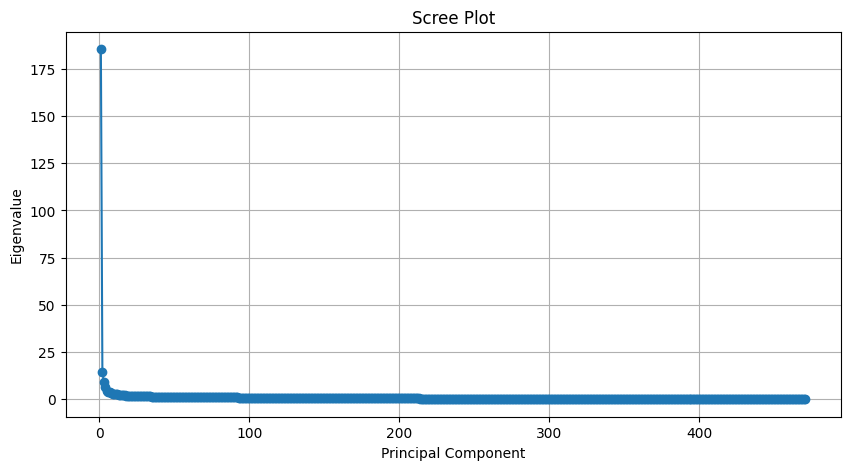

In [25]:
import matplotlib.pyplot as plt

# Assume pca_info_df is already defined as given and contains the PCA information
# Plotting the line plot between Component and Eigenvalue
plt.figure(figsize=(10, 5))
plt.plot(pca_info_df['Component'], pca_info_df['Eigenvalue'], marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


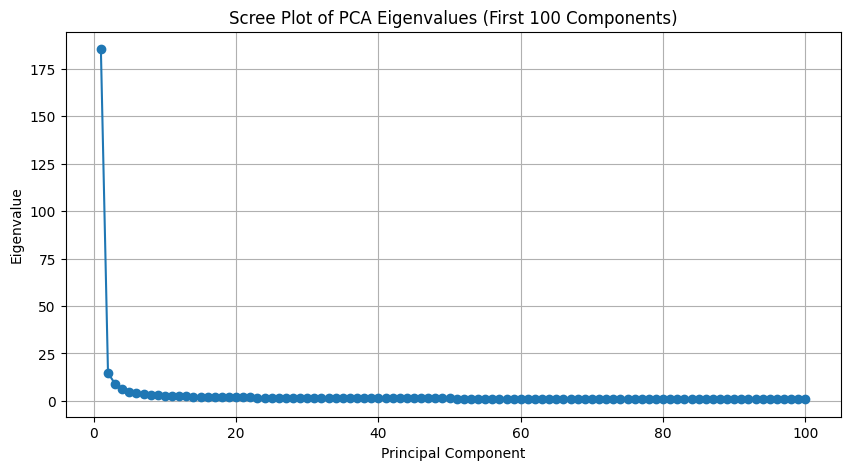

In [26]:
import matplotlib.pyplot as plt

# Assuming pca_info_df is already defined and contains the PCA information for all components

# Plotting the scree plot for the first 100 principal components
plt.figure(figsize=(10, 5))
plt.plot(pca_info_df['Component'][:100], pca_info_df['Eigenvalue'][:100], marker='o')
plt.title('Scree Plot of PCA Eigenvalues (First 100 Components)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


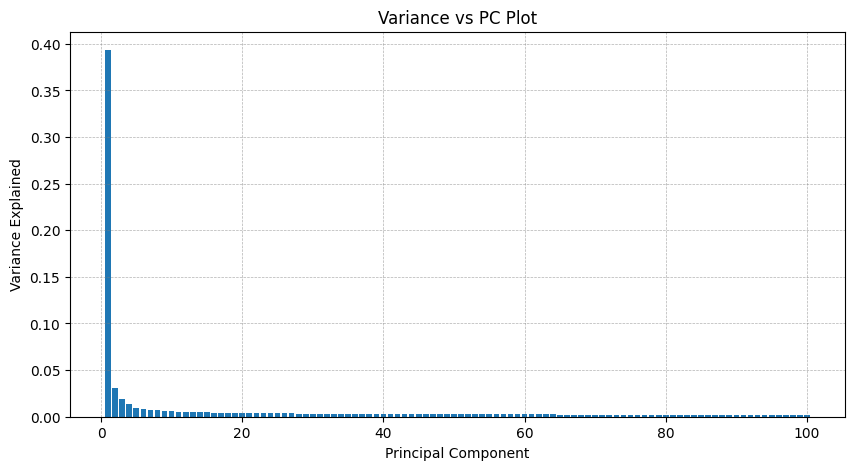

In [27]:
# Scree plot
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_) + 1), explained_variance_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Variance vs PC Plot')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color='grey')
plt.show()

# 3 . Create a second plot showing cumulative variance retained if top N components are kept after dimensionality reduction

In [30]:
# Cumulative variance for top '100' Components
cumulative_variance = np.cumsum(explained_variance)

cumulative_variance

array([0.39327749, 0.42446264, 0.4434628 , 0.45709987, 0.46691358,
       0.47561184, 0.48324937, 0.49005271, 0.49645607, 0.5022331 ,
       0.50778426, 0.51314692, 0.51815283, 0.52290349, 0.52748266,
       0.5318914 , 0.53623249, 0.54046483, 0.54452207, 0.54850669,
       0.55238245, 0.55619631, 0.55991389, 0.56358982, 0.56722644,
       0.57081781, 0.57433186, 0.57772802, 0.58109832, 0.58442772,
       0.58773689, 0.59098091, 0.59415201, 0.59730344, 0.60039825,
       0.6034431 , 0.60646319, 0.60945504, 0.61242765, 0.61538322,
       0.61830141, 0.62118089, 0.6240527 , 0.62690091, 0.62972342,
       0.63253363, 0.63528639, 0.63802476, 0.64073545, 0.64342517,
       0.64608572, 0.64871693, 0.65131738, 0.6538965 , 0.65646053,
       0.65901749, 0.66154198, 0.6640441 , 0.66653998, 0.66901637,
       0.67147167, 0.67389694, 0.6763197 , 0.6787265 , 0.68110604,
       0.68346584, 0.6858082 , 0.68812482, 0.69043326, 0.69271842,
       0.69500003, 0.69727356, 0.69952887, 0.7017805 , 0.70401

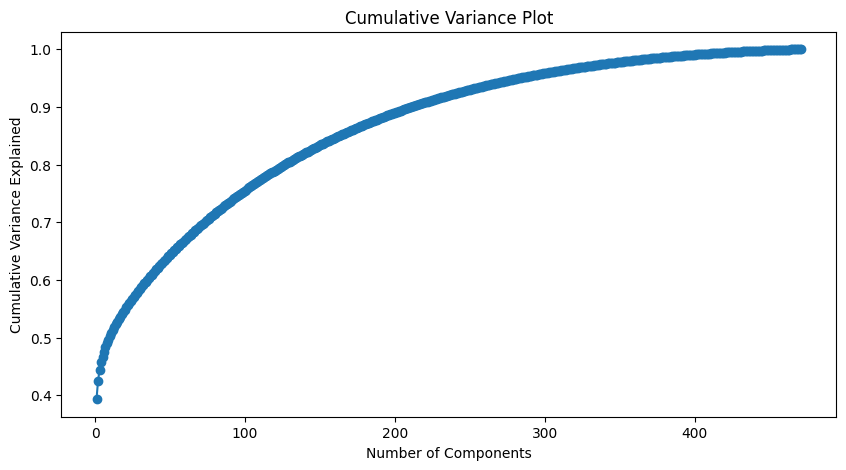

In [31]:
# Cumulative variance plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Plot')
plt.show()



# 4. How many principal components must be retained in order to capture at least 80% of the total variance in data?

In [32]:
# Number of components to retain 80% variance
num_components_80_percent = np.where(cumulative_variance >= 0.8)[0][0] + 1
print(f"Number of components to retain 80% of variance: {num_components_80_percent}")

Number of components to retain 80% of variance: 127


# b)

## 1. Compute and plot the time series of the 1st principal component and observe temporal patterns

<Figure size 1200x600 with 0 Axes>

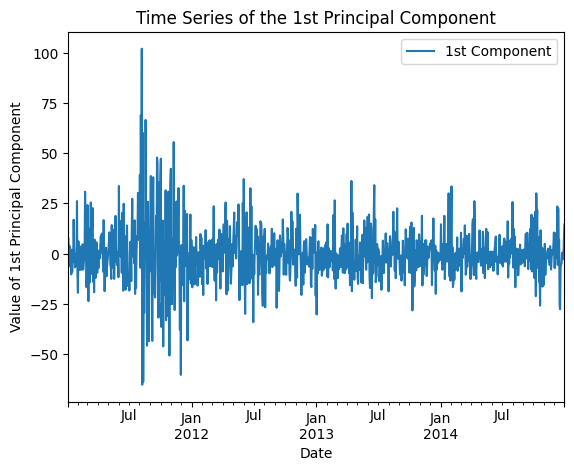

Date with the lowest value for the 1st principal component: 2011-08-09 00:00:00


In [34]:
# Compute the time series of the 1st principal component
first_component_time_series = pca.transform(scaled_data)[:, 0]

# Creating a DataFrame for the time series using the original index from log_returns
first_component_df = pd.DataFrame(first_component_time_series, index=log_returns.index, columns=['1st Component'])

# Plotting the time series of the 1st principal component
plt.figure(figsize=(12, 6))
first_component_df.plot(title='Time Series of the 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Value of 1st Principal Component')
plt.show()

# Identifying the date with the lowest value for the 1st principal component
lowest_value_date = first_component_df.idxmin()
print("Date with the lowest value for the 1st principal component:", lowest_value_date[0])

# 2. Extract the weights from the PCA model for 1st and 2nd principal components

In [35]:
# Extracting the weights for the 1st and 2nd principal components
weights_first_component = pca.components_[0]
weights_second_component = pca.components_[1]

# Creating a DataFrame to hold these weights
weights_df = pd.DataFrame({
    'Stock': log_returns.columns,
    '1st Component Weights': weights_first_component,
    '2nd Component Weights': weights_second_component
})

# Displaying the first few rows of the DataFrame
weights_df.head()


,Stock,1st Component Weights,2nd Component Weights
0,MMM,-0.061483,-0.004348
1,ACE,-0.056123,0.037012
2,ABT,-0.013384,0.016967
3,ANF,-0.031428,-0.038111
4,ADBE,-0.048731,-0.022370


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have the PCA model fitted and the sector data loaded
# Load the sector data
sector_data = pd.read_csv('/content/drive/MyDrive/733_homework3/homework3/SP500_ticker.csv', encoding= 'windows-1252')  # Replace with your file path
sector_data['sector'] = sector_data['sector'].str.strip()
sector_data


,ticker,company_name,sector
0,MMM,3M Co.,Industrials
1,ACE,ACE Limited,Financials
2,ABT,Abbott Laboratories,Health Care
3,ANF,Abercrombie & Fitch Company A,Consumer Discretionary
4,ADBE,Adobe Systems Inc,Information Technology
...,...,...,...
495,XL,XL Capital,Financials
496,YHOO,Yahoo Inc.,Information Technology
497,YUM,Yum! Brands Inc,Consumer Discretionary
498,ZMH,Zimmer Holdings,Health Care


In [37]:
# Merge the weights with the sector data
merged_data = pd.merge(weights_df, sector_data, left_on='Stock', right_on='ticker')

merged_data

,Stock,1st Component Weights,2nd Component Weights,ticker,company_name,sector
0,MMM,-0.061483,-0.004348,MMM,3M Co.,Industrials
1,ACE,-0.056123,0.037012,ACE,ACE Limited,Financials
2,ABT,-0.013384,0.016967,ABT,Abbott Laboratories,Health Care
3,ANF,-0.031428,-0.038111,ANF,Abercrombie & Fitch Company A,Consumer Discretionary
4,ADBE,-0.048731,-0.022370,ADBE,Adobe Systems Inc,Information Technology
...,...,...,...,...,...,...
464,XL,-0.056008,0.004637,XL,XL Capital,Financials
465,YHOO,-0.037920,-0.026708,YHOO,Yahoo Inc.,Information Technology
466,YUM,-0.040894,0.003042,YUM,Yum! Brands Inc,Consumer Discretionary
467,ZMH,-0.049911,0.008004,ZMH,Zimmer Holdings,Health Care


In [38]:
# Group by sector and calculate mean weights for the 1st principal component
grouped_weights = merged_data.groupby('sector')['1st Component Weights'].mean()

grouped_weights

sector
Consumer Discretionary        -0.041449
Consumer Staples              -0.034657
Energy                        -0.046582
Financials                    -0.053559
Health Care                   -0.040472
Industrials                   -0.049450
Information Technology        -0.041540
Materials                     -0.045777
Telecommunications Services   -0.034257
Utilities                     -0.040671
Name: 1st Component Weights, dtype: float64

# 3. Create a plot to show weights of the 1st principal component grouped by the industry sector

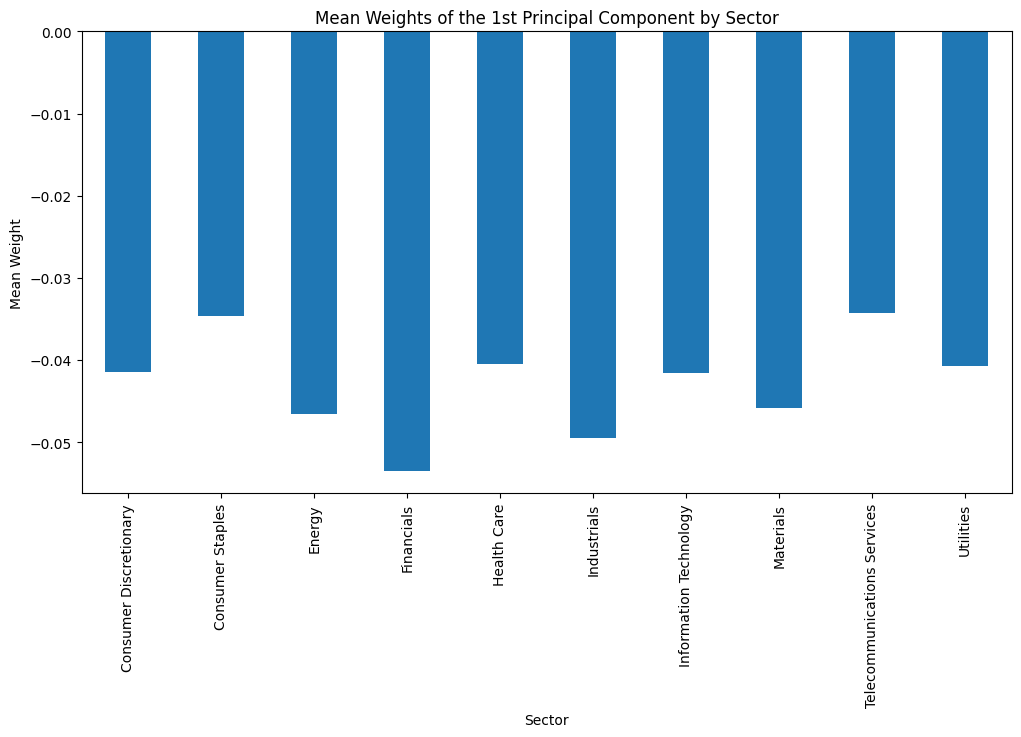

In [39]:
# Create a bar plot for the 1st principal component weights by sector
plt.figure(figsize=(12, 6))
grouped_weights.plot(kind='bar')
plt.title('Mean Weights of the 1st Principal Component by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Weight')
plt.show()


# 4. Create a plot to show weights of the 2nd principal component grouped by the industry sector

sector
Consumer Discretionary        -0.006975
Consumer Staples               0.045294
Energy                        -0.037365
Financials                     0.004759
Health Care                    0.008405
Industrials                   -0.014528
Information Technology        -0.032975
Materials                     -0.024872
Telecommunications Services    0.034539
Utilities                      0.111650
Name: 2nd Component Weights, dtype: float64


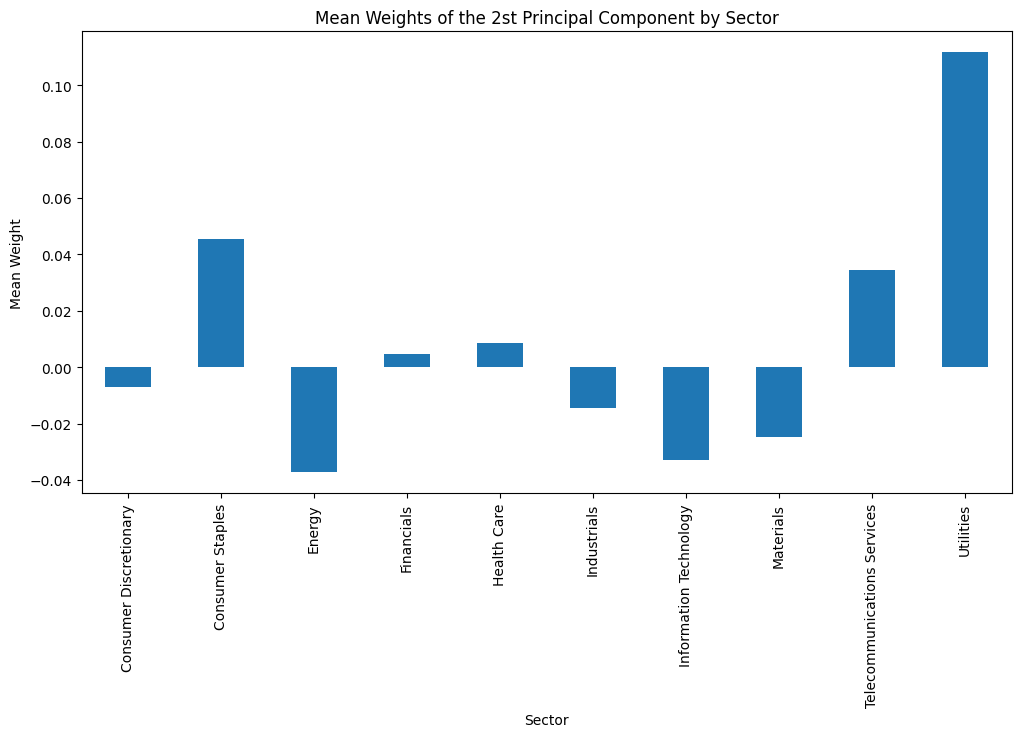

In [40]:
# Merge the weights with the sector data
merged_data = pd.merge(weights_df, sector_data, left_on='Stock', right_on='ticker')

# Group by sector and calculate mean weights for the 1st principal component
grouped_weights = merged_data.groupby('sector')['2nd Component Weights'].mean()
print(grouped_weights)
# Create a bar plot for the 1st principal component weights by sector
plt.figure(figsize=(12, 6))
grouped_weights.plot(kind='bar')
plt.title('Mean Weights of the 2st Principal Component by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Weight')
plt.show()

## Bonus Question

In [41]:
# Load the data
data_path = '/content/drive/MyDrive/733_homework3/homework3/latest_combined_stock_data.csv'  # Replace with your file path
sp500_data = pd.read_csv(data_path)

# Convert the date column to datetime and set it as the index
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])
sp500_data.set_index('Date', inplace=True)
sp500_data.head(2)

,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03 00:00:00-05:00,58.093964,NaN,17.371456,42.839287,31.290001,8.47,8.949051,28.201321,20.862745,27.013277,...,NaN,77.028130,15.394320,19.750259,NaN,NaN,NaN,27.644394,NaN,20.047056
2011-01-04 00:00:00-05:00,58.013615,NaN,17.534920,41.503098,31.510000,8.77,8.991869,28.346689,20.482037,26.761719,...,NaN,79.431061,15.459659,19.227415,NaN,NaN,NaN,27.222052,NaN,19.720497


In [42]:
# Drop columns with a single NaN value
threshold = len(sp500_data) - 1  # Set the threshold to one less than the number of rows
sp500_data.dropna(axis=1, thresh=threshold, inplace=True)
sp500_data

,MMM,ABT,ANF,ADBE,AMD,AES,AFL,A,APD,AKAM,...,WU,WY,WHR,WMB,WEC,WYNN,XEL,XRX,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03 00:00:00-05:00,58.093964,17.371456,42.839287,31.290001,8.470000,8.949051,20.862745,27.013277,60.903774,48.259998,...,11.544831,12.257368,61.696102,10.214463,19.268404,77.028130,15.394320,19.750259,27.644394,20.047056
2011-01-04 00:00:00-05:00,58.013615,17.534920,41.503098,31.510000,8.770000,8.991869,20.482037,26.761719,60.002308,47.139999,...,11.464746,12.127100,60.809563,10.140084,19.025909,79.431061,15.459659,19.227415,27.222052,19.720497
2011-01-05 00:00:00-05:00,58.013615,17.534920,40.860844,32.220001,8.910000,9.113190,20.442148,26.703667,59.739933,48.849998,...,11.668040,12.505494,61.218739,10.156608,18.921045,80.455818,15.368182,19.328615,27.351568,19.832001
2011-01-06 00:00:00-05:00,57.658844,17.498590,39.517277,32.270000,8.690000,9.270188,20.329752,26.755280,59.430489,48.450001,...,11.932944,12.418646,59.916210,10.135952,18.986588,81.042442,15.355119,19.328615,27.543028,19.776247
2011-01-07 00:00:00-05:00,57.719101,17.571247,39.546803,32.040001,8.830000,9.270188,20.249987,26.845573,59.538113,48.689999,...,11.822056,12.759819,59.663879,10.297104,19.130777,83.911812,15.492336,19.058752,27.886545,19.569166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,95.339996,99.550003,73.570000,602.659973,120.620003,17.010000,81.769997,113.150002,269.989990,112.370003,...,12.020000,31.920000,112.489998,35.430000,81.739998,86.870003,60.560001,13.770000,127.660004,36.070000
2023-11-20 00:00:00-05:00,94.980003,101.199997,72.290001,612.700012,121.529999,17.209999,81.169998,113.980003,272.149994,112.470001,...,11.980000,32.230000,111.379997,35.610001,81.320000,87.169998,60.060001,13.620000,128.119995,35.779999
2023-11-21 00:00:00-05:00,93.989998,101.910004,74.029999,610.989990,119.160004,16.740000,81.900002,123.919998,276.339996,113.129997,...,11.910000,31.780001,108.620003,35.950001,80.919998,86.860001,60.020000,13.560000,128.240005,34.310001


In [43]:
sp500_data.shift(1).head(3)
sp500_data.shift(1)

,MMM,ABT,ANF,ADBE,AMD,AES,AFL,A,APD,AKAM,...,WU,WY,WHR,WMB,WEC,WYNN,XEL,XRX,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04 00:00:00-05:00,58.093964,17.371456,42.839287,31.290001,8.470000,8.949051,20.862745,27.013277,60.903774,48.259998,...,11.544831,12.257368,61.696102,10.214463,19.268404,77.028130,15.394320,19.750259,27.644394,20.047056
2011-01-05 00:00:00-05:00,58.013615,17.534920,41.503098,31.510000,8.770000,8.991869,20.482037,26.761719,60.002308,47.139999,...,11.464746,12.127100,60.809563,10.140084,19.025909,79.431061,15.459659,19.227415,27.222052,19.720497
2011-01-06 00:00:00-05:00,58.013615,17.534920,40.860844,32.220001,8.910000,9.113190,20.442148,26.703667,59.739933,48.849998,...,11.668040,12.505494,61.218739,10.156608,18.921045,80.455818,15.368182,19.328615,27.351568,19.832001
2011-01-07 00:00:00-05:00,57.658844,17.498590,39.517277,32.270000,8.690000,9.270188,20.329752,26.755280,59.430489,48.450001,...,11.932944,12.418646,59.916210,10.135952,18.986588,81.042442,15.355119,19.328615,27.543028,19.776247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,95.709999,100.260002,68.980003,602.059998,119.830002,16.910000,81.110001,114.190002,273.600006,111.370003,...,12.000000,31.740000,112.279999,34.750000,82.370003,85.809998,60.700001,13.580000,127.830002,35.709999
2023-11-20 00:00:00-05:00,95.339996,99.550003,73.570000,602.659973,120.620003,17.010000,81.769997,113.150002,269.989990,112.370003,...,12.020000,31.920000,112.489998,35.430000,81.739998,86.870003,60.560001,13.770000,127.660004,36.070000
2023-11-21 00:00:00-05:00,94.980003,101.199997,72.290001,612.700012,121.529999,17.209999,81.169998,113.980003,272.149994,112.470001,...,11.980000,32.230000,111.379997,35.610001,81.320000,87.169998,60.060001,13.620000,128.119995,35.779999


In [44]:
# Calculate log returns
log_returns = np.log(sp500_data / sp500_data.shift(1))
log_returns = log_returns.dropna()  # Drop NaN values resulting from the shift operation
log_returns.head()

,MMM,ABT,ANF,ADBE,AMD,AES,AFL,A,APD,AKAM,...,WU,WY,WHR,WMB,WEC,WYNN,XEL,XRX,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-04 00:00:00-05:00,-0.001384,0.009366,-0.031688,0.007006,0.034806,0.004773,-0.018417,-0.009356,-0.014912,-0.023481,...,-0.006961,-0.010685,-0.014474,-0.007308,-0.012665,0.030719,0.004235,-0.026829,-0.015396,-0.016424
2011-01-05 00:00:00-05:00,0.000000,0.000000,-0.015596,0.022282,0.015837,0.013402,-0.001949,-0.002172,-0.004382,0.035632,...,0.017577,0.030725,0.006706,0.001628,-0.005527,0.012819,-0.005935,0.005250,0.004747,0.005638
2011-01-06 00:00:00-05:00,-0.006134,-0.002074,-0.033434,0.001551,-0.025001,0.017081,-0.005513,0.001931,-0.005193,-0.008222,...,0.022449,-0.006969,-0.021506,-0.002036,0.003458,0.007265,-0.000850,0.000000,0.006976,-0.002815
2011-01-07 00:00:00-05:00,0.001045,0.004144,0.000747,-0.007153,0.015982,0.000000,-0.003931,0.003369,0.001809,0.004941,...,-0.009336,0.027102,-0.004220,0.015774,0.007566,0.034793,0.008897,-0.014060,0.012395,-0.010526
2011-01-10 00:00:00-05:00,0.010613,-0.008929,0.012429,0.028310,0.039961,-0.001541,-0.012975,0.014313,0.000113,0.002052,...,-0.008898,0.011120,0.004676,-0.006845,0.002737,-0.000252,-0.006347,0.009687,0.001412,-0.018070


In [49]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca.fit(scaled_data)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
explained_variance_ = explained_variance[:150]
explained_variance_

# Creating a Python object (dictionary) that maps each principal component to its eigenvalue and explained variance ratio
pca_info = {
    'Component': range(1, len(pca.explained_variance_) + 1),
    'Eigenvalue': pca.explained_variance_,
    'Explained Variance Ratio': pca.explained_variance_ratio_
}

pca_info_df = pd.DataFrame(pca_info)
pca_info_df.head()  # Displaying the first few rows of the DataFrame for verification


,Component,Eigenvalue,Explained Variance Ratio
0,1,131.343010,0.395490
1,2,17.577636,0.052928
2,3,10.043281,0.030242
3,4,6.660831,0.020057
4,5,5.736871,0.017274


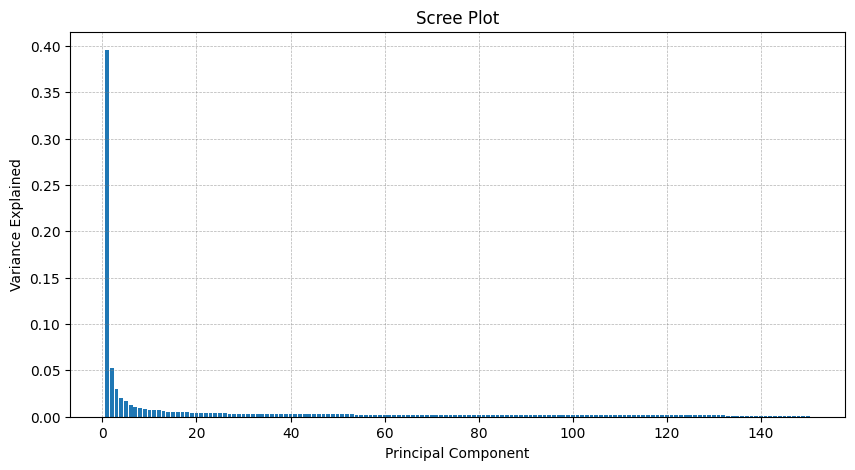

array([0.39548956, 0.44841793, 0.47865946, 0.49871602, 0.51599042,
       0.52897965, 0.53974274, 0.54912495, 0.55721996, 0.56484713,
       0.57234613, 0.57907239, 0.58490476, 0.59046405, 0.5955112 ,
       0.60034958, 0.60513783, 0.60973113, 0.61404729, 0.6182786 ,
       0.62242733, 0.62635636, 0.63016478, 0.63386728, 0.63747957,
       0.64099866, 0.64440442, 0.64779182, 0.65110753, 0.65439201,
       0.65756789, 0.66070513, 0.66379659, 0.66685568, 0.66987228,
       0.67284497, 0.67577557, 0.67862911, 0.68144872, 0.68423623,
       0.68699467, 0.68972479, 0.69242361, 0.69509459, 0.69770046,
       0.70026625, 0.70282389, 0.70532601, 0.70781229, 0.71027786,
       0.7127239 , 0.71512716, 0.71752509, 0.71988647, 0.72222552,
       0.7245414 , 0.72682653, 0.72910011, 0.73136378, 0.73358867,
       0.7358005 , 0.73800529, 0.74018205, 0.74234742, 0.74448256,
       0.74661183, 0.74870955, 0.75079591, 0.75286002, 0.75489858,
       0.75693357, 0.75892058, 0.76089934, 0.76286351, 0.76482

In [53]:
# Scree plot
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_) + 1), explained_variance_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6, color='grey')
plt.show()

# Cumulative variance for top '100' Components
cumulative_variance = np.cumsum(explained_variance)

cumulative_variance

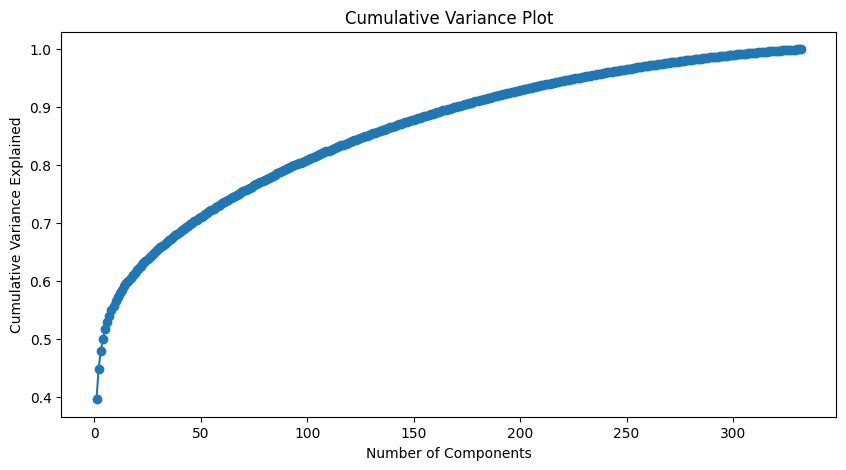

Number of components to retain 80% of variance: 95


In [54]:
# Cumulative variance plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Plot')
plt.show()

# Number of components to retain 80% variance
num_components_80_percent = np.where(cumulative_variance >= 0.8)[0][0] + 1
print(f"Number of components to retain 80% of variance: {num_components_80_percent}")

## Problem 2

In [55]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [56]:
data_path = '/content/drive/MyDrive/733_homework3/homework3/BMI.csv'  # Replace with your file path
bmi_data = pd.read_csv(data_path)
bmi_data.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,fatpctg
0,22,160.8,62.4,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
1,22,170.6,80.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,23,153.9,69.3,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
3,23,157.1,70.4,35.5,92.1,77.1,93.9,56.1,36.1,22.7,30.5,27.2,18.2,9.4
4,23,196.5,88.6,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3,10.3


In [57]:
# Preparing the data
X = bmi_data.drop('fatpctg', axis=1)
y = bmi_data['fatpctg']
# Collecting feature names for easier interpretation


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
feature_names = X_train.columns

In [58]:
# a) Wrapper method: Backward and forward stepwise regression
model = LinearRegression()

In [66]:
# Backward stepwise regression using RFECV
selector_backward = RFECV(model, step=1, cv=5)
selector_backward.fit(X_train, y_train)
features_selected_backward = X.columns[selector_backward.support_]

# Forward stepwise regression using RFE
#This is wrong
#selector_forward = RFE(model, n_features_to_select=5, step=1)
#selector_forward.fit(X_train, y_train)
#features_selected_forward = X.columns[selector_forward.support_]

# Output
print("Backward: ",features_selected_backward)
#print("Forward: ",features_selected_forward)

Backward:  Index(['Abdomen', 'Wrist'], dtype='object')


scikit-learn doesn't provide a built-in forward selection method equivalent to RFE.

In [71]:
# Backward stepwise regression using RFE
selector_backward = RFE(model, n_features_to_select=13, step=1)
selector_backward.fit(X_train, y_train)
features_selected_backward = X.columns[selector_backward.support_]

from sklearn.metrics import mean_squared_error

# Initialize variables
n_features = X_train.shape[1]
selected_features = []
remaining_features = list(X_train.columns)
best_score = float('inf')

# Forward feature selection loop
for _ in range(13):  # Select 5 features
    best_feature = None
    for feature in remaining_features:
        # Try adding this feature
        trial_features = selected_features + [feature]
        trial_X_train = X_train[trial_features]

        # Fit the model and evaluate
        model.fit(trial_X_train, y_train)
        predictions = model.predict(trial_X_train)
        score = mean_squared_error(y_train, predictions)

        # Update the best feature if this one is better
        if score < best_score:
            best_score = score
            best_feature = feature

    # Update the lists of selected and remaining features
    if best_feature is not None:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

# Output
print("Top 5 features - Backward Stepwise Regression:", list(features_selected_backward))
print("Top 5 features - Forward Stepwise Regression:", list(selected_features))


Top 5 features - Backward Stepwise Regression: ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
Top 5 features - Forward Stepwise Regression: ['Abdomen', 'Wrist', 'Weight', 'Biceps', 'Age', 'Neck', 'Height', 'Forearm', 'Thigh', 'Hip', 'Chest', 'Ankle', 'Knee']


In [61]:
# b) Filter method: Ranking features using correlation
correlation_with_target = X_train.apply(lambda x: x.corr(y_train))
correlation_ranking = correlation_with_target.abs().sort_values(ascending=False)
correlation_ranking

Abdomen    0.823493
Chest      0.710263
Hip        0.631852
Weight     0.617122
Thigh      0.542245
Knee       0.497806
Neck       0.483474
Biceps     0.471752
Forearm    0.345679
Wrist      0.323690
Age        0.299926
Ankle      0.226892
Height     0.106820
dtype: float64

In [62]:
# c) Embedded methods:
# (1) Lasso regression
lasso = Lasso(alpha=0.01)  # Small alpha for feature selection, not too aggressive
lasso.fit(X_train, y_train)
lasso_coef = np.abs(lasso.coef_)
lasso_coef
# Creating a DataFrame with feature names and their coefficients from the Lasso regression model
lasso_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coef
})

# Sorting the DataFrame by coefficient for better visualization
lasso_feature_importance_df = lasso_feature_importance_df.sort_values(by='Coefficient', ascending=False)
lasso_feature_importance_df.reset_index(drop=True, inplace=True)
lasso_feature_importance_df


,Feature,Coefficient
0,Wrist,2.109029
1,Abdomen,0.980187
2,Neck,0.422322
3,Biceps,0.314264
4,Forearm,0.232864
5,Thigh,0.160673
6,Ankle,0.134259
7,Hip,0.127771
8,Chest,0.078316
9,Height,0.066845


In [63]:
# (2) Random forest for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_



# Creating a DataFrame with feature names and their importance from the Random Forest model
rf_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
})

# Sorting the DataFrame by importance for better visualization
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
rf_feature_importance_df.reset_index(drop=True, inplace=True)
rf_feature_importance_df


,Feature,Importance
0,Abdomen,0.714957
1,Weight,0.031164
2,Wrist,0.030504
3,Height,0.029040
4,Hip,0.028463
5,Neck,0.026902
6,Chest,0.024049
7,Age,0.023840
8,Ankle,0.019951
9,Biceps,0.019619


In [79]:
# Given rankings from different feature selection methods
backward_ranking = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
forward_ranking = ['Abdomen', 'Wrist', 'Weight', 'Biceps', 'Age', 'Neck', 'Height', 'Forearm', 'Thigh', 'Hip', 'Chest', 'Ankle', 'Knee']
correlation_ranking = ['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh', 'Knee', 'Neck', 'Biceps', 'Forearm', 'Wrist', 'Age', 'Ankle', 'Height']
lasso_ranking = ['Wrist', 'Abdomen', 'Neck', 'Biceps', 'Forearm', 'Thigh', 'Ankle', 'Hip', 'Chest', 'Height', 'Age', 'Weight', 'Knee']
rf_ranking = ['Abdomen', 'Weight', 'Wrist', 'Height', 'Hip', 'Neck', 'Chest', 'Age', 'Ankle', 'Biceps', 'Knee', 'Forearm', 'Thigh']

# Combine all rankings into a DataFrame for easier manipulation
rankings_df = pd.DataFrame({
    'Feature': backward_ranking,
    'Backward': range(1, 14),
    'Forward': [forward_ranking.index(feature) + 1 for feature in backward_ranking],
    'Correlation': [correlation_ranking.index(feature) + 1 for feature in backward_ranking],
    'Lasso': [lasso_ranking.index(feature) + 1 for feature in backward_ranking],
    'RandomForest': [rf_ranking.index(feature) + 1 for feature in backward_ranking]
})

# Sort the DataFrame by the average rank
rankings_df = rankings_df.sort_values(by='RandomForest')


rankings_df = rankings_df.reset_index(drop=True)

rankings_df


,Feature,Backward,Forward,Correlation,Lasso,RandomForest
0,Abdomen,6,1,1,2,1
1,Weight,2,3,4,12,2
2,Wrist,13,2,10,1,3
3,Height,3,7,13,10,4
4,Hip,7,10,3,8,5
5,Neck,4,6,7,3,6
6,Chest,5,11,2,9,7
7,Age,1,5,11,11,8
8,Ankle,10,12,12,7,9
9,Biceps,11,4,8,4,10


### Data collection for Bonus question

In [ ]:
#! pip install yfinance

In [ ]:
#tickers = list(sp500_data.columns)

In [ ]:
'''import yfinance as yf
import pandas as pd

# List of tickers you are interested in
tickers_list = tickers  # Replace with your tickers

# Start and end dates
start_date = "2011-01-01"
end_date = "2023-11-25"  # Replace with current date if you want the latest data

# Create an empty DataFrame for the combined data
combined_data = pd.DataFrame()

for ticker in tickers_list:
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
     # Print the structure and attributes of the data
    print(f"Data for ticker {ticker}:")
    data.head()  # Print the first few rows

    combined_data[ticker] = data['Close']  # Add only the closing prices

# Save the combined data to a CSV file
csv_filename = "/content/drive/MyDrive/733_homework3/homework3/latest_combined_stock_data.csv"
combined_data.to_csv(csv_filename)
print(f"Combined stock data saved to {csv_filename}")
'''